In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# pandas 출력 설정
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# 시각화 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('whitegrid')
sns.set_palette('husl')

print('환경 설정 완료!')

환경 설정 완료!


## 1. 캐글 데이터셋 불러오기

### 1.1 Titanic 데이터셋 다운로드 및 로드 하기


In [5]:
# 방법1: 캐글 API 사용 (kaggle API 설치 및 인증 필요)
# !kaggle competitions download -c titanic


# 방법2: 직접 다운로드 후 로드 (일반적인 방식)
# https://www.kaggle.com/c/titanic/data 에서 다운로드

# 방법3: seaborn 내장 데이터 셋 사용(연습용)

titanic = sns.load_dataset('titanic')


# 또는 로컬 파일에서 로드
# titanic = pd.read_csv('train.csv')

print('=== 데이터셋 기본 정보 ===')
print(f'Dataset shape: {titanic.shape}')
print(f'Columns: {list(titanic.columns)}')
print(f'Memory usage: {titanic.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB')

# 첫 몇행 확인
print('\n === 데이터 샘플 ===')
print(titanic.head())

# 데이터 타입 확인
print('\n === 데이터 타입 ===')
print(titanic.dtypes)

# 기본 통계 정보
print('\n === 기본 통계 ===')
print(titanic.describe())

=== 데이터셋 기본 정보 ===
Dataset shape: (891, 15)
Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
Memory usage: 0.31 MB

 === 데이터 샘플 ===
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   yes  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton    no   True

 === 데이터 타입 ===
survive

## 1.2 데이터 품질 확인

In [9]:
# 1. 기본 정보
print(f'Dataset shape: {titanic.shape[0]:,} rows x {titanic.shape[1]} columns')
print(f'Memory usage: {titanic.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB')

Dataset shape: 891 rows x 15 columns
Memory usage: 0.31 MB


In [11]:
# 2. 데이터 타입 분포
dtype_counts = titanic.dtypes.value_counts()

print(f'\n Data Types Distribution:')
for dtype, count in dtype_counts.items():
    print(f'   {dtype}: {count} columns')


 Data Types Distribution:
   object: 5 columns
   int64: 4 columns
   float64: 2 columns
   bool: 2 columns
   category: 1 columns
   category: 1 columns


In [12]:
# 3. 결측값 분석
missing_data = titanic.isnull().sum()
missing_percent = (missing_data / len(titanic)) * 100

missing_info = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)

print(f'\n Missing Values Analysis:')
missing_cols = missing_info[missing_info['Missing_Count'] > 0]
if len(missing_cols) > 0:
    print(missing_cols)
else:
    print('No missing values found!')


 Missing Values Analysis:
             Missing_Count  Missing_Percentage
deck                   688           77.216611
age                    177           19.865320
embarked                 2            0.224467
embark_town              2            0.224467


In [16]:
# 4. 중복값 확인
duplicates = titanic.duplicated().sum()
print(f'\n Duplicate Rows: {duplicates} ({duplicates/len(titanic)*100:.1f}%)')


 Duplicate Rows: 107 (12.0%)


In [18]:
# 5. 유니크값 분석 (범주형 데이터)
print(f'\n Unique Values Analysis:')
categorical_cols = titanic.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    unique_count = titanic[col].nunique()
    unique_ratio = unique_count / len(titanic) * 100
    print(f'  {col}: {unique_count} unique values ({unique_ratio:.1f}%)')



 Unique Values Analysis:
  sex: 2 unique values (0.2%)
  embarked: 3 unique values (0.3%)
  class: 3 unique values (0.3%)
  who: 3 unique values (0.3%)
  deck: 7 unique values (0.8%)
  embark_town: 3 unique values (0.3%)
  alive: 2 unique values (0.2%)


## 1.3 탐색적 데이터 분석 (EDA) 시작

In [24]:
print('=== 생존률 기본 분석 ===')
survival_rate = titanic['survived'].mean()
print(f'Overall Survival Rate:{survival_rate:.1%}')

survival_counts = titanic['survived'].value_counts()
print(titanic['survived'])
print(survival_counts)
print(f'Survived:{survival_counts[1]} passengers')
print(f'Did not Survive:{survival_counts[0]} passengers')

=== 생존률 기본 분석 ===
Overall Survival Rate:38.4%
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64
survived
0    549
1    342
Name: count, dtype: int64
Survived:342 passengers
Did not Survive:549 passengers


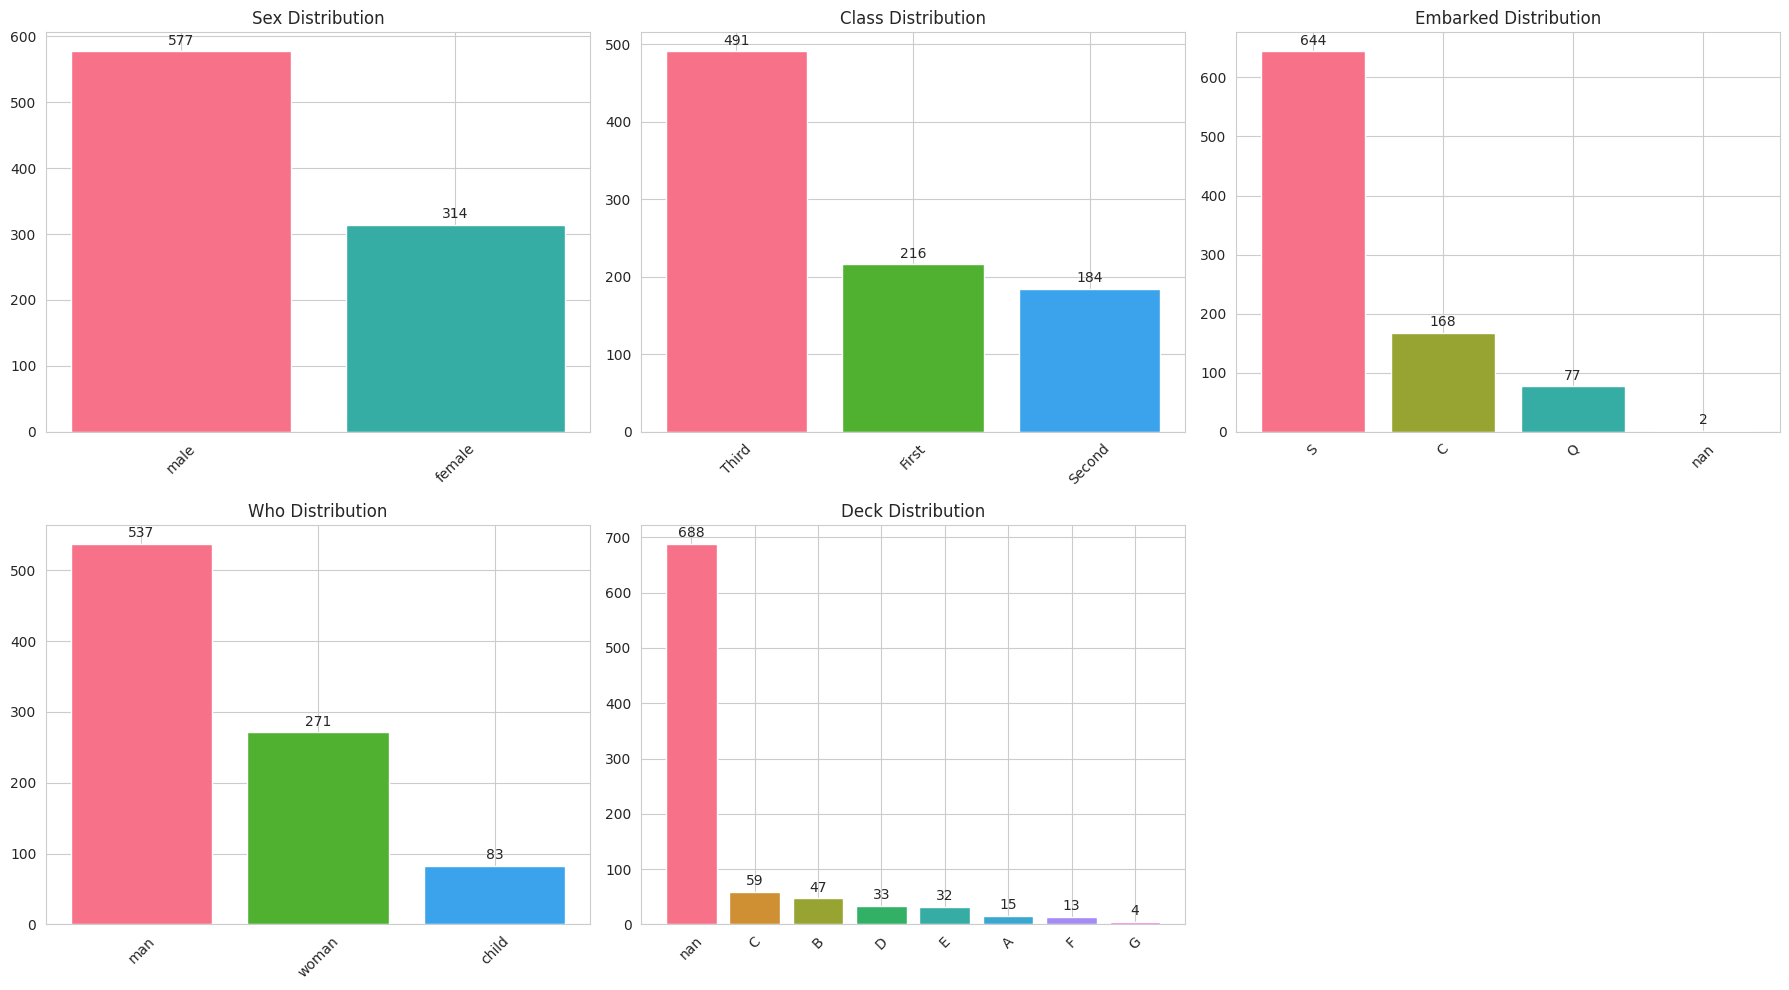

In [28]:
# 범주형 변수들의 분포 확인
categorical_columns = ['sex', 'class', 'embarked', 'who', 'deck']

fig, axes = plt.subplots(2, 3, figsize=(18,10))

axes = axes.flatten()


for i, col in enumerate(categorical_columns):
    if col in titanic.columns:
        # 결측값이 있는 경우 처리
        if titanic[col].isnull().any():
            value_counts = titanic[col].value_counts(dropna = False)

        else:
            value_counts = titanic[col].value_counts()

    axes[i].bar(range(len(value_counts)), value_counts.values,
               color = sns.color_palette('husl', len(value_counts)))
    axes[i].set_title(f'{col.title()} Distribution')
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=45)

    # 값 레이블 추가
    for j, v in enumerate(value_counts.values):
        axes[i].text(j, v + max(value_counts.values) * 0.01, str(v),
                     ha='center', va='bottom')

# 빈 subplot 숨기기
for i in range(len(categorical_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# 2. 데이터 조작 및 전처리

## 2.1 결측값 처리 (Missing Data Handling)

In [31]:
missing_data = titanic.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(titanic)) * 100


missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
})


# 결측값이 있는 컬럼만 필터링하기
missing_df = missing_df[missing_df['Missing_Count'] > 0]

print('=== Missing Data Analysis ===')
print(missing_df)

=== Missing Data Analysis ===
             Missing_Count  Missing_Percentage
deck                   688           77.216611
age                    177           19.865320
embarked                 2            0.224467
embark_town              2            0.224467


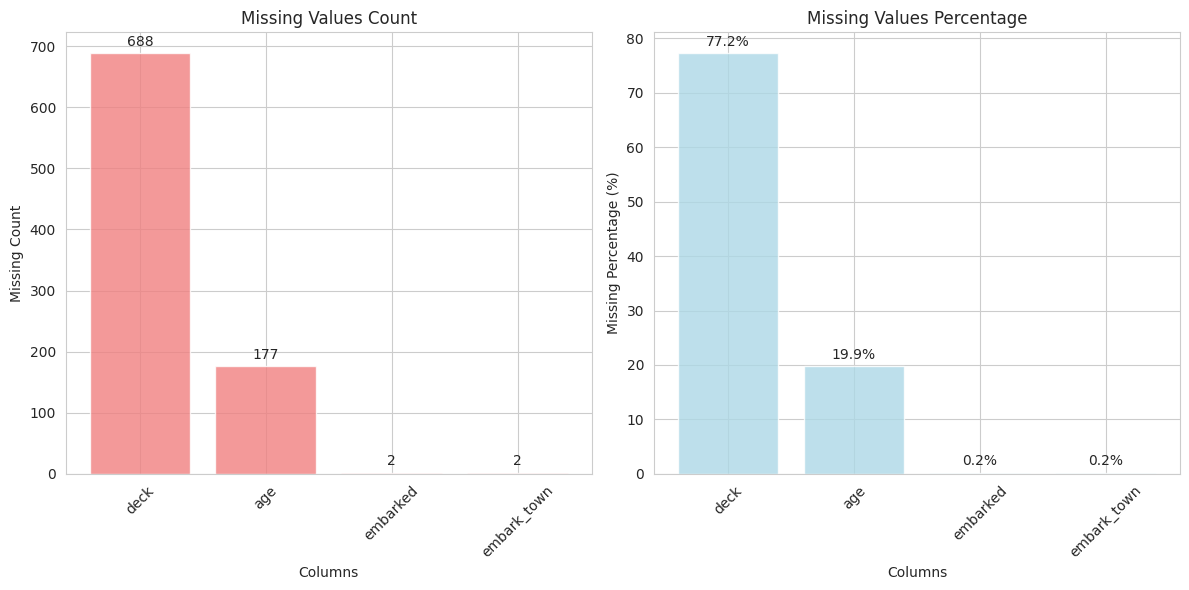

In [34]:
# 결측값 패턴 시각화
if len(missing_df) > 0:
    plt.figure(figsize=(12,6))

    # 결측값 개수
    plt.subplot(1, 2, 1)
    bars = plt.bar(range(len(missing_df)), missing_df['Missing_Count'],
        color='lightcoral', alpha=0.8)
    plt.title('Missing Values Count')
    plt.xlabel('Columns')
    plt.ylabel('Missing Count')
    plt.xticks(range(len(missing_df)), missing_df.index,  rotation=45)

    # 막대 위에 값 표시
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + max(missing_df['Missing_Count']) * 0.01,
            f'{int(height)}', ha='center', va='bottom')

    # 결측값 비율
    plt.subplot(1, 2, 2)
    bars = plt.bar(range(len(missing_df)), missing_df['Missing_Percentage'], 
                      color='lightblue', alpha=0.8)
    plt.title('Missing Values Percentage')
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(range(len(missing_df)), missing_df.index, rotation=45)

    # 막대 위에 값 표시
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(missing_df['Missing_Percentage']) * 0.01,
                f'{height:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

In [41]:
# 결측값 처리 실행
titanic_processed = titanic.copy()

# 범용 Categorical 결측값 처리 함수
def handle_categorical_fillna(df, column, fill_value):
    """Categorical 컬럼의 결측값을 안전하게 처리하는 함수"""
    if column not in df.columns:
        return df
    
    if df[column].isnull().any():
        if df[column].dtype.name == 'category':
            # 카테고리에 fill_value가 없으면 추가
            if fill_value not in df[column].cat.categories:
                df[column] = df[column].cat.add_categories([fill_value])
            df[column] = df[column].fillna(fill_value)
        else:
            df[column] = df[column].fillna(fill_value)
        
        print(f"✅ {column} 결측값 처리 완료: '{fill_value}'로 대체")
    
    return df

# 1. Age 결측값 처리
if 'age' in titanic_processed.columns:
    age_median_by_group = titanic_processed.groupby(['sex', 'class'])['age'].median()
    
    def fill_age(row):
        if pd.isna(row['age']):
            return age_median_by_group.get((row['sex'], row['class']), 
                                         titanic_processed['age'].median())
        return row['age']
    
    titanic_processed['age'] = titanic_processed.apply(fill_age, axis=1)
    print(f"✅ Age 결측값 처리 완료: {titanic['age'].isnull().sum()} → {titanic_processed['age'].isnull().sum()}")

# 2. Embarked 결측값 처리
if 'embarked' in titanic_processed.columns and titanic_processed['embarked'].isnull().any():
    most_common_port = titanic_processed['embarked'].mode()[0]
    titanic_processed = handle_categorical_fillna(titanic_processed, 'embarked', most_common_port)

# 3. Deck 결측값 처리
titanic_processed = handle_categorical_fillna(titanic_processed, 'deck', 'Unknown')

# 처리 후 결측값 확인
print(f"\n=== 처리 후 결측값 현황 ===")
remaining_missing = titanic_processed.isnull().sum()
print(remaining_missing[remaining_missing > 0])

✅ Age 결측값 처리 완료: 177 → 0
✅ embarked 결측값 처리 완료: 'S'로 대체
✅ deck 결측값 처리 완료: 'Unknown'로 대체

=== 처리 후 결측값 현황 ===
embark_town    2
dtype: int64


## 2.2 새로운 특성 생성 (Feature Engineering)

In [43]:
# 새로운 특성 생성
def create_new_features(df):
    """도메인 지식을 활용한 새로운 특성 생성"""
    df = df.copy()
    
    # 1. 가족 규모
    if 'sibsp' in df.columns and 'parch' in df.columns:
        df['family_size'] = df['sibsp'] + df['parch'] + 1  # 본인 포함
        
        # 가족 규모 카테고리화
        def categorize_family_size(size):
            if size == 1:
                return 'Alone'
            elif size <= 4:
                return 'Small'
            else:
                return 'Large'
        
        df['family_size_category'] = df['family_size'].apply(categorize_family_size)
        print("✅ 가족 규모 특성 생성 완료")
    
    # 2. 연령 그룹
    if 'age' in df.columns:
        age_bins = [0, 12, 18, 35, 60, 100]
        age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
        df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
        print("✅ 연령 그룹 특성 생성 완료")
    
    # 3. 요금 그룹 (사분위수 기반)
    if 'fare' in df.columns:
        df['fare_group'] = pd.qcut(df['fare'].fillna(df['fare'].median()), 
                                  q=4, labels=['Low', 'Medium', 'High', 'Premium'])
        print("✅ 요금 그룹 특성 생성 완료")
    
    # 4. 타이틀 추출 (이름에서)
    if 'name' in df.columns:
        df['title'] = df['name'].str.extract('([A-Za-z]+)\.', expand=False)
        
        # 타이틀 그룹화
        title_mapping = {
            'Mr': 'Mr',
            'Miss': 'Miss',
            'Mrs': 'Mrs',
            'Master': 'Master',
            'Dr': 'Officer',
            'Rev': 'Officer',
            'Col': 'Officer',
            'Major': 'Officer',
            'Mlle': 'Miss',
            'Countess': 'Royalty',
            'Ms': 'Miss',
            'Lady': 'Royalty',
            'Jonkheer': 'Royalty',
            'Don': 'Royalty',
            'Dona': 'Royalty',
            'Mme': 'Mrs',
            'Capt': 'Officer',
            'Sir': 'Royalty'
        }
        
        df['title_grouped'] = df['title'].map(title_mapping).fillna('Other')
        print("✅ 타이틀 특성 생성 완료")
    
    # 5. 혼자 여행 여부
    if 'family_size' in df.columns:
        df['is_alone'] = (df['family_size'] == 1).astype(int)
        print("✅ 혼자 여행 특성 생성 완료")
    
    return df

# 새로운 특성 생성 실행
titanic_engineered = create_new_features(titanic_processed)

print(f"\n=== 특성 엔지니어링 완료 ===")
print(f"Original features: {len(titanic.columns)}")
print(f"New features: {len(titanic_engineered.columns)}")
print(f"Added features: {list(set(titanic_engineered.columns) - set(titanic.columns))}")

# 새로운 특성들 확인
new_features = ['family_size', 'family_size_category', 'age_group', 'fare_group', 
               'title_grouped', 'is_alone']

existing_new_features = [feat for feat in new_features if feat in titanic_engineered.columns]

print(f"\n=== 새로운 특성 분포 ===")
for feature in existing_new_features:
    print(f"\n{feature}:")
    print(titanic_engineered[feature].value_counts())


✅ 가족 규모 특성 생성 완료
✅ 연령 그룹 특성 생성 완료
✅ 요금 그룹 특성 생성 완료
✅ 혼자 여행 특성 생성 완료

=== 특성 엔지니어링 완료 ===
Original features: 15
New features: 20
Added features: ['age_group', 'fare_group', 'is_alone', 'family_size', 'family_size_category']

=== 새로운 특성 분포 ===

family_size:
family_size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

family_size_category:
family_size_category
Alone    537
Small    292
Large     62
Name: count, dtype: int64

age_group:
age_group
Young Adult    366
Adult          209
Child           68
Teen            45
Senior          26
Name: count, dtype: int64

fare_group:
fare_group
Medium     224
Low        223
High       222
Premium    222
Name: count, dtype: int64

is_alone:
is_alone
1    537
0    354
Name: count, dtype: int64


## 2.3 데이터 필터링 및 정렬

In [45]:
# pandas의 강력한 필터링 기능 (SQL WHERE절과 비교)
print("=== 데이터 필터링 예제 (SQL 쿼리와 비교) ===")

# 먼저 사용 가능한 컬럼 확인
print(f"사용 가능한 컬럼: {list(titanic_engineered.columns)}")
print()

# 1. 단순 조건 필터링
# SQL: SELECT * FROM titanic WHERE age > 60;
seniors = titanic_engineered[titanic_engineered['age'] > 60]
print(f"1. 60세 이상 승객: {len(seniors)}명")

# 2. 복합 조건
# SQL: SELECT * FROM titanic WHERE sex = 'female' AND class = 'First' AND survived = 1;
first_class_female_survivors = titanic_engineered[
    (titanic_engineered['sex'] == 'female') & 
    (titanic_engineered['class'] == 'First') & 
    (titanic_engineered['survived'] == 1)
]
print(f"2. 1등급 여성 생존자: {len(first_class_female_survivors)}명")

# 3. IN 조건
# SQL: SELECT * FROM titanic WHERE class IN ('First', 'Second');
upper_class = titanic_engineered[titanic_engineered['class'].isin(['First', 'Second'])]
print(f"3. 1-2등급 승객: {len(upper_class)}명")

# 4. 문자열 패턴 매칭 (name 컬럼이 없으므로 다른 예제로 변경)
# SQL: SELECT * FROM titanic WHERE embarked = 'S';
if 'embarked' in titanic_engineered.columns:
    southampton_passengers = titanic_engineered[titanic_engineered['embarked'] == 'S']
    print(f"4. 사우스햄튼 출발 승객: {len(southampton_passengers)}명")

# 5. NULL 값 확인
# SQL: SELECT * FROM titanic WHERE age IS NOT NULL;
non_null_age = titanic_engineered[titanic_engineered['age'].notna()]
print(f"5. 나이 정보가 있는 승객: {len(non_null_age)}명")

# 6. 범위 조건
# SQL: SELECT * FROM titanic WHERE fare BETWEEN 10 AND 50;
mid_fare_passengers = titanic_engineered[
    (titanic_engineered['fare'] >= 10) & (titanic_engineered['fare'] <= 50)
]
print(f"6. 요금 10-50 범위 승객: {len(mid_fare_passengers)}명")

# 정렬 (SQL ORDER BY)
print(f"\n=== 데이터 정렬 예제 ===")

# 1. 단일 컬럼 정렬 (name 컬럼이 없으므로 다른 컬럼으로 변경)
# SQL: SELECT * FROM titanic ORDER BY fare DESC;
sorted_by_fare = titanic_engineered.sort_values('fare', ascending=False)
print("1. 요금 기준 내림차순 상위 5명:")
# 사용 가능한 컬럼들로 출력
available_cols = ['fare', 'class', 'sex', 'age']
display_cols = [col for col in available_cols if col in titanic_engineered.columns]
print(sorted_by_fare[display_cols].head())

# 2. 다중 컬럼 정렬
# SQL: SELECT * FROM titanic ORDER BY class ASC, fare DESC;
sorted_multi = titanic_engineered.sort_values(['class', 'fare'], ascending=[True, False])
print(f"\n2. 클래스 오름차순, 요금 내림차순 상위 5명:")
print(sorted_multi[display_cols].head())

# 3. 인덱스 기준 정렬
sorted_by_index = titanic_engineered.sort_index()
print(f"\n3. 인덱스 기준 정렬 완료 (shape: {sorted_by_index.shape})")

# 추가: 더 복합적인 필터링 예제
print(f"\n=== 추가 필터링 예제 ===")

# 7. 여러 조건을 만족하는 승객들
survivors_with_family = titanic_engineered[
    (titanic_engineered['survived'] == 1) & 
    (titanic_engineered['sibsp'] > 0) |  # 형제자매가 있거나
    (titanic_engineered['parch'] > 0)    # 부모자식이 있는 경우
]
print(f"7. 가족과 함께 탑승한 생존자: {len(survivors_with_family)}명")

# 8. 나이대별 필터링 (새로 생성한 age_group이 있다면)
if 'age_group' in titanic_engineered.columns:
    children = titanic_engineered[titanic_engineered['age_group'] == 'Child']
    print(f"8. 어린이 승객: {len(children)}명")

# 9. 요금 상위 10% 승객들
top_10_percent_threshold = titanic_engineered['fare'].quantile(0.9)
expensive_ticket_passengers = titanic_engineered[titanic_engineered['fare'] >= top_10_percent_threshold]
print(f"9. 요금 상위 10% 승객: {len(expensive_ticket_passengers)}명 (임계값: {top_10_percent_threshold:.2f})")

# 10. 조건부 집계와 필터링
print(f"\n=== 조건부 집계 예제 ===")

# 클래스별 생존율이 50% 이상인 클래스만 필터링
class_survival_rate = titanic_engineered.groupby('class')['survived'].mean()
high_survival_classes = class_survival_rate[class_survival_rate >= 0.5]
print(f"10. 생존율 50% 이상 클래스:")
for class_name, rate in high_survival_classes.items():
    print(f"    {class_name}: {rate:.1%}")

# 실제 pandas와 SQL 쿼리 패턴 비교표 출력
print(f"\n=== pandas vs SQL 쿼리 패턴 비교 ===")
comparison_table = """
┌─────────────────────────────────────────────┬─────────────────────────────────────────────┐
│                    SQL                      │                   pandas                    │
├─────────────────────────────────────────────┼─────────────────────────────────────────────┤
│ SELECT * FROM table WHERE age > 30          │ df[df['age'] > 30]                         │
│ SELECT col1, col2 FROM table                │ df[['col1', 'col2']]                       │
│ WHERE col1 = 'value' AND col2 > 10          │ df[(df['col1']=='value') & (df['col2']>10)] │
│ WHERE col IN ('A', 'B', 'C')                │ df[df['col'].isin(['A', 'B', 'C'])]        │
│ ORDER BY col1 DESC                          │ df.sort_values('col1', ascending=False)    │
│ ORDER BY col1 ASC, col2 DESC                │ df.sort_values(['col1','col2'], ascending=[True,False]) │
│ WHERE col IS NOT NULL                       │ df[df['col'].notna()]                      │
│ WHERE col LIKE '%text%'                     │ df[df['col'].str.contains('text')]         │
│ WHERE col BETWEEN 10 AND 50                 │ df[(df['col']>=10) & (df['col']<=50)]      │
└─────────────────────────────────────────────┴─────────────────────────────────────────────┘
"""
print(comparison_table)

=== 데이터 필터링 예제 (SQL 쿼리와 비교) ===
사용 가능한 컬럼: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone', 'family_size', 'family_size_category', 'age_group', 'fare_group', 'is_alone']

1. 60세 이상 승객: 22명
2. 1등급 여성 생존자: 91명
3. 1-2등급 승객: 400명
4. 사우스햄튼 출발 승객: 644명
5. 나이 정보가 있는 승객: 714명
6. 요금 10-50 범위 승객: 395명

=== 데이터 정렬 예제 ===
1. 요금 기준 내림차순 상위 5명:
         fare  class     sex   age
679  512.3292  First    male  36.0
258  512.3292  First  female  35.0
737  512.3292  First    male  35.0
88   263.0000  First  female  23.0
438  263.0000  First    male  64.0

2. 클래스 오름차순, 요금 내림차순 상위 5명:
         fare  class     sex   age
258  512.3292  First  female  35.0
679  512.3292  First    male  36.0
737  512.3292  First    male  35.0
27   263.0000  First    male  19.0
88   263.0000  First  female  23.0

3. 인덱스 기준 정렬 완료 (shape: (891, 20))

=== 추가 필터링 예제 ===
7. 가족과 함께 탑승한 생존자: 283명
8. 어린이 승객: 68명
9. 요금 상위 10% 승객: 90명 (임계값: 

# 📊 3. 그룹화와 집계 분석

## 3.1 그룹화 기본 (GROUP BY와 비교)

In [46]:
# pandas groupby vs SQL GROUP BY 비교

print("=== 그룹화 및 집계 분석 ===")

# 1. 기본 그룹화
# SQL: SELECT sex, COUNT(*) FROM titanic GROUP BY sex;
gender_counts = titanic_engineered.groupby('sex').size()
print("1. 성별 승객 수:")
print(gender_counts)

# 2. 다중 집계 함수
# SQL: SELECT class, AVG(age), COUNT(*), MIN(fare), MAX(fare) FROM titanic GROUP BY class;
class_stats = titanic_engineered.groupby('class').agg({
    'age': ['mean', 'count'],
    'fare': ['min', 'max', 'mean'],
    'survived': 'mean'
}).round(2)

# 컬럼명 정리
class_stats.columns = ['avg_age', 'passenger_count', 'min_fare', 'max_fare', 'avg_fare', 'survival_rate']
print(f"\n2. 클래스별 통계:")
print(class_stats)

# 3. 다중 그룹화
# SQL: SELECT sex, class, COUNT(*), AVG(survived) FROM titanic GROUP BY sex, class;
survival_by_gender_class = titanic_engineered.groupby(['sex', 'class']).agg({
    'survived': ['count', 'sum', 'mean']
}).round(3)

survival_by_gender_class.columns = ['total_passengers', 'survivors', 'survival_rate']
print(f"\n3. 성별-클래스별 생존율:")
print(survival_by_gender_class)

# 4. 조건부 집계 (CASE WHEN과 유사)
def age_survival_analysis(df):
    """연령대별 생존율 분석"""
    if 'age_group' in df.columns:
        age_survival = df.groupby('age_group').agg({
            'survived': ['count', 'sum', 'mean'],
            'fare': 'mean'
        }).round(2)
        
        age_survival.columns = ['total', 'survivors', 'survival_rate', 'avg_fare']
        return age_survival
    return None

age_analysis = age_survival_analysis(titanic_engineered)
if age_analysis is not None:
    print(f"\n4. 연령대별 생존율:")
    print(age_analysis)

# 5. 커스텀 집계 함수
def custom_stats(series):
    """커스텀 통계 함수"""
    return pd.Series({
        'count': len(series),
        'mean': series.mean(),
        'std': series.std(),
        'q25': series.quantile(0.25),
        'median': series.median(),
        'q75': series.quantile(0.75)
    })

print(f"\n5. 클래스별 요금 상세 통계:")
fare_detailed_stats = titanic_engineered.groupby('class')['fare'].apply(custom_stats).round(2)
print(fare_detailed_stats)

=== 그룹화 및 집계 분석 ===
1. 성별 승객 수:
sex
female    314
male      577
dtype: int64

2. 클래스별 통계:
        avg_age  passenger_count  min_fare  max_fare  avg_fare  survival_rate
class                                                                        
First     38.23              186       0.0    512.33     84.15           0.63
Second    29.88              173       0.0     73.50     20.66           0.47
Third     25.14              355       0.0     69.55     13.68           0.24

3. 성별-클래스별 생존율:
               total_passengers  survivors  survival_rate
sex    class                                             
female First                 94         91          0.968
       Second                76         70          0.921
       Third                144         72          0.500
male   First                122         45          0.369
       Second               108         17          0.157
       Third                347         47          0.135

4. 연령대별 생존율:
             total  survi

## 3.2 피벗 테이블과 크로스탭

=== 피벗 테이블 분석 ===
1. 클래스-성별 생존율 피벗 테이블:
sex     female   male
class                
First    0.968  0.369
Second   0.921  0.157
Third    0.500  0.135

2. 다중 값 피벗 테이블 (생존율 & 평균 요금):
          fare        survived      
sex     female   male   female  male
class                               
First   106.13  67.23     0.97  0.37
Second   21.97  19.74     0.92  0.16
Third    16.12  12.66     0.50  0.14

3. 연령대-클래스 크로스탭:
class        First  Second  Third  All
age_group                             
Child            4      17     47   68
Teen             8       6     31   45
Young Adult     61      97    208  366
Adult           96      49     64  209
Senior          17       4      5   26
All            186     173    355  714

4. 연령대별 클래스 비율:
class        First  Second  Third
age_group                        
Child        0.059   0.250  0.691
Teen         0.178   0.133  0.689
Young Adult  0.167   0.265  0.568
Adult        0.459   0.234  0.306
Senior       0.654   0.154  0.192


<Figure size 1200x800 with 0 Axes>

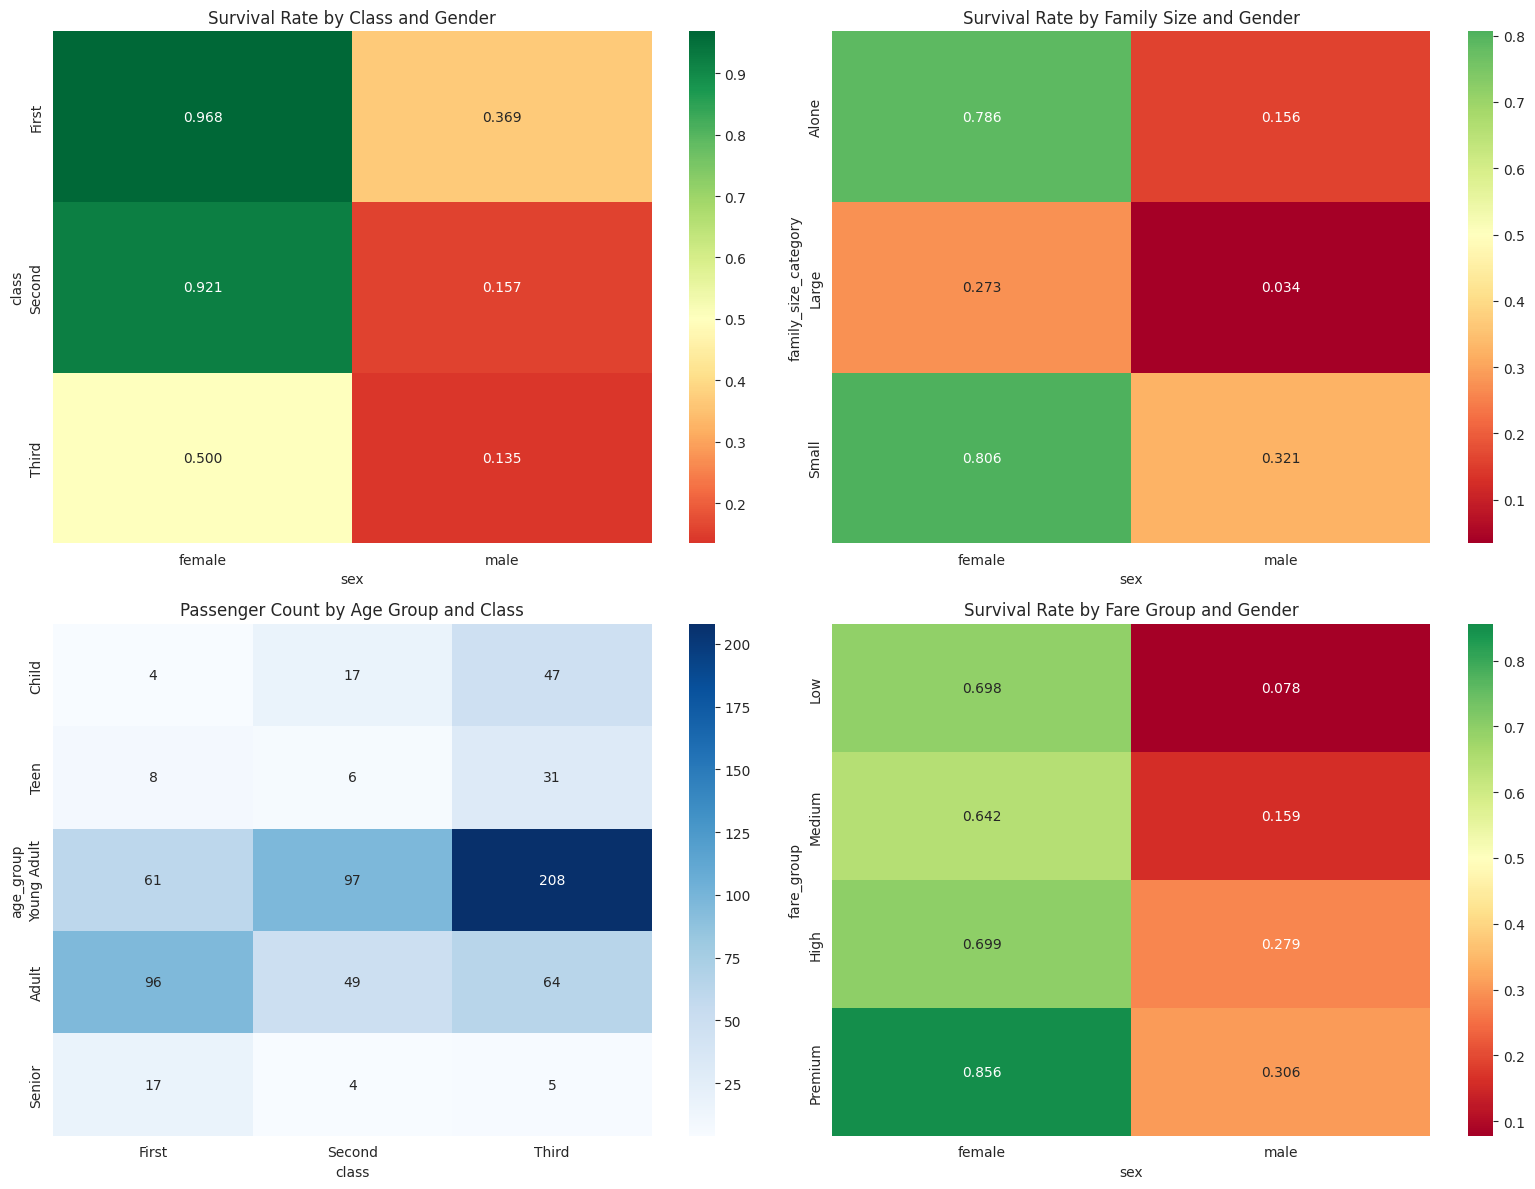

In [47]:
# Excel 피벗 테이블과 유사한 pandas 피벗 테이블

print("=== 피벗 테이블 분석 ===")

# 1. 기본 피벗 테이블 - 생존율
survival_pivot = pd.pivot_table(
    titanic_engineered,
    values='survived',
    index='class',
    columns='sex',
    aggfunc='mean'
).round(3)

print("1. 클래스-성별 생존율 피벗 테이블:")
print(survival_pivot)

# 2. 다중 값 피벗 테이블
multi_value_pivot = pd.pivot_table(
    titanic_engineered,
    values=['survived', 'fare'],
    index='class',
    columns='sex',
    aggfunc={'survived': 'mean', 'fare': 'mean'}
).round(2)

print(f"\n2. 다중 값 피벗 테이블 (생존율 & 평균 요금):")
print(multi_value_pivot)

# 3. 크로스탭 - 빈도수 분석
if 'age_group' in titanic_engineered.columns:
    crosstab_age_class = pd.crosstab(
        titanic_engineered['age_group'],
        titanic_engineered['class'],
        margins=True  # 총계 추가
    )
    
    print(f"\n3. 연령대-클래스 크로스탭:")
    print(crosstab_age_class)
    
    # 비율로 변환
    crosstab_normalized = pd.crosstab(
        titanic_engineered['age_group'],
        titanic_engineered['class'],
        normalize='index'  # 행 기준 비율
    ).round(3)
    
    print(f"\n4. 연령대별 클래스 비율:")
    print(crosstab_normalized)

# 5. 생존율 히트맵 시각화
plt.figure(figsize=(12, 8))

# 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. 클래스-성별 생존율 히트맵
sns.heatmap(survival_pivot, annot=True, fmt='.3f', cmap='RdYlGn', 
           center=0.5, ax=axes[0,0])
axes[0,0].set_title('Survival Rate by Class and Gender')

# 2. 가족 규모별 생존율 (있는 경우)
if 'family_size_category' in titanic_engineered.columns:
    family_survival = pd.pivot_table(
        titanic_engineered,
        values='survived',
        index='family_size_category',
        columns='sex',
        aggfunc='mean'
    )
    sns.heatmap(family_survival, annot=True, fmt='.3f', cmap='RdYlGn',
               center=0.5, ax=axes[0,1])
    axes[0,1].set_title('Survival Rate by Family Size and Gender')

# 3. 연령대-클래스 승객 수 히트맵
if 'age_group' in titanic_engineered.columns:
    age_class_counts = pd.pivot_table(
        titanic_engineered,
        values='survived',
        index='age_group',
        columns='class',
        aggfunc='count',
        fill_value=0
    )
    sns.heatmap(age_class_counts, annot=True, fmt='d', cmap='Blues',
               ax=axes[1,0])
    axes[1,0].set_title('Passenger Count by Age Group and Class')

# 4. 요금 그룹별 생존율 히트맵
if 'fare_group' in titanic_engineered.columns:
    fare_survival = pd.pivot_table(
        titanic_engineered,
        values='survived',
        index='fare_group',
        columns='sex',
        aggfunc='mean'
    )
    sns.heatmap(fare_survival, annot=True, fmt='.3f', cmap='RdYlGn',
               center=0.5, ax=axes[1,1])
    axes[1,1].set_title('Survival Rate by Fare Group and Gender')

plt.tight_layout()
plt.show()

# 📈 4. 심화 데이터 분석 및 시각화

## 4.1 상관관계 분석

=== 상관관계 분석 ===
1. 생존과의 상관관계 (절댓값 기준):
pclass                    -0.338481
fare                       0.257307
fare_rank_in_class        -0.214012
is_alone                  -0.203367
age_percentile_in_class   -0.199295
parch                      0.081629
age                       -0.077221
sibsp                     -0.035322
family_size                0.016639
Name: survived, dtype: float64


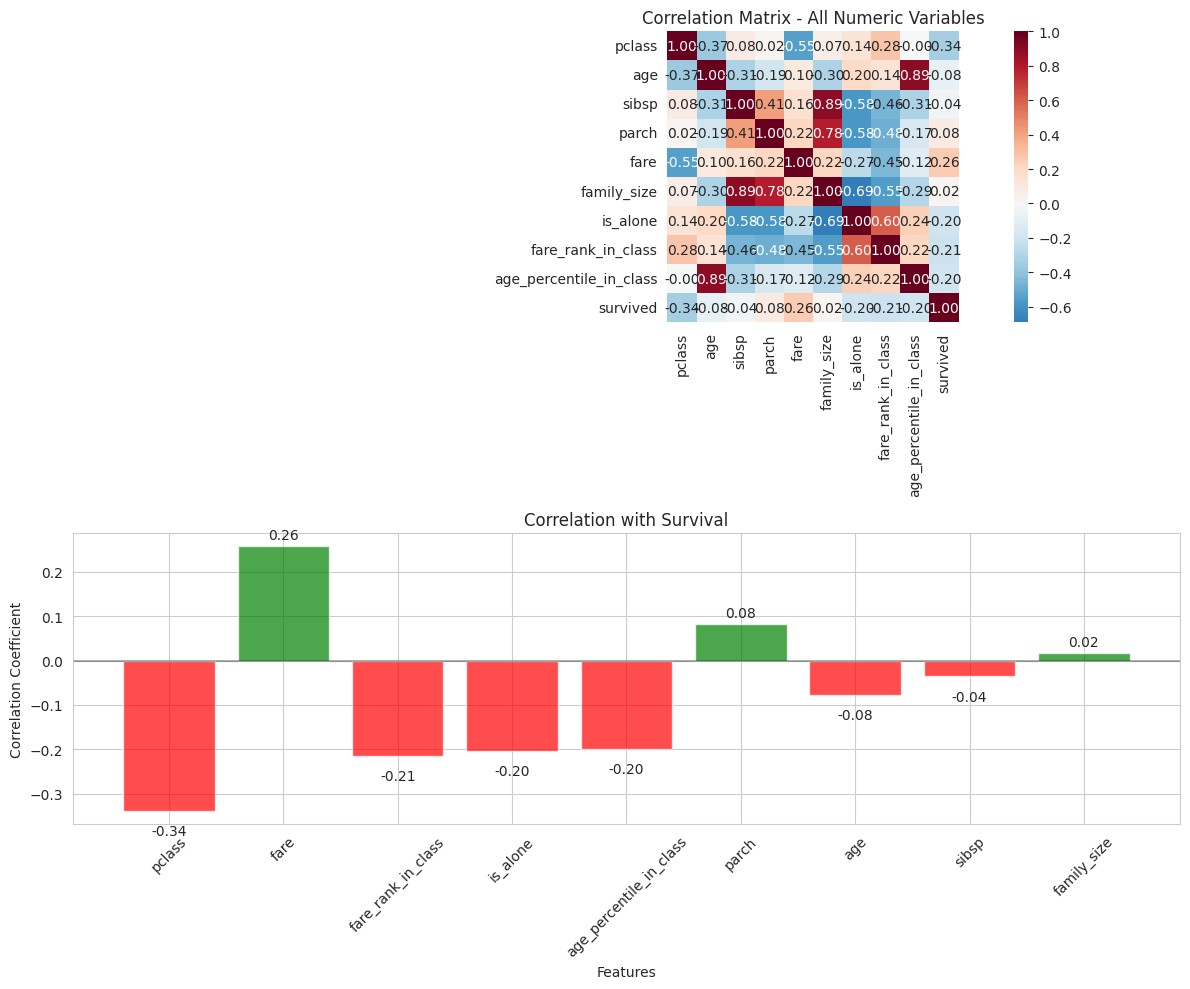

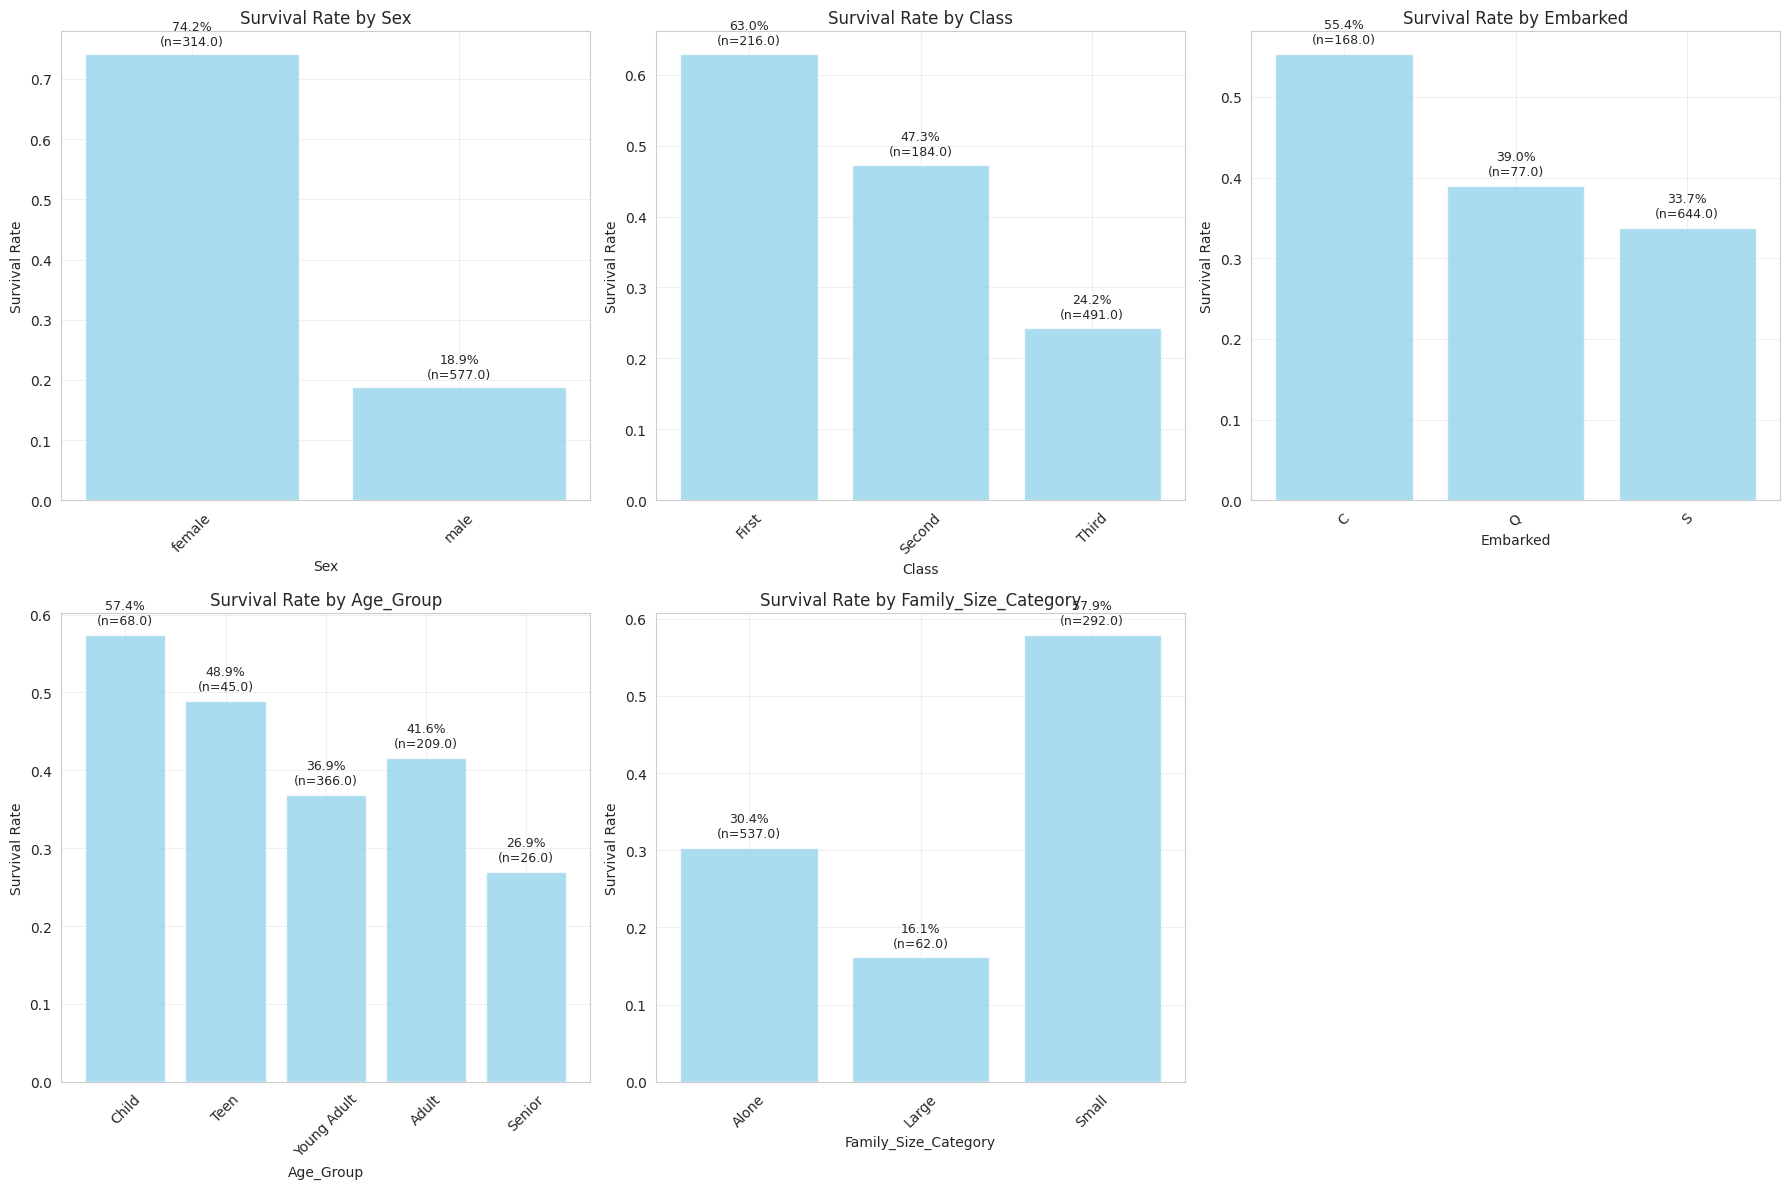

In [49]:
# 상관관계 분석 및 시각화

print("=== 상관관계 분석 ===")

# 수치형 변수만 선택
numeric_columns = titanic_engineered.select_dtypes(include=[np.number]).columns.tolist()

# 생존 여부를 제외한 수치형 변수들
feature_columns = [col for col in numeric_columns if col != 'survived']

if len(feature_columns) > 1:
    # 상관관계 매트릭스 계산
    correlation_matrix = titanic_engineered[feature_columns + ['survived']].corr()
    
    # 생존과의 상관관계만 추출
    survival_correlation = correlation_matrix['survived'].sort_values(key=abs, ascending=False)
    
    print("1. 생존과의 상관관계 (절댓값 기준):")
    print(survival_correlation.drop('survived'))
    
    # 상관관계 히트맵
    plt.figure(figsize=(12, 10))
    
    # 전체 상관관계 히트맵
    plt.subplot(2, 1, 1)
    sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
                fmt='.2f', square=True)
    plt.title('Correlation Matrix - All Numeric Variables')
    
    # 생존과의 상관관계 막대그래프
    plt.subplot(2, 1, 2)
    survival_corr_plot = survival_correlation.drop('survived')
    colors = ['green' if x > 0 else 'red' for x in survival_corr_plot.values]
    bars = plt.bar(range(len(survival_corr_plot)), survival_corr_plot.values, color=colors, alpha=0.7)
    plt.title('Correlation with Survival')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(range(len(survival_corr_plot)), survival_corr_plot.index, rotation=45)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # 막대 위에 값 표시
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height > 0 else -0.03),
                f'{height:.2f}', ha='center', va='bottom' if height > 0 else 'top')
    
    plt.tight_layout()
    plt.show()

# 범주형 변수와 생존의 관계
categorical_columns = ['sex', 'class', 'embarked', 'age_group', 'family_size_category']
existing_categorical = [col for col in categorical_columns if col in titanic_engineered.columns]

if existing_categorical:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(existing_categorical):
        if i < len(axes):
            # 생존율 계산
            survival_by_category = titanic_engineered.groupby(col)['survived'].agg(['mean', 'count'])
            
            # 막대그래프
            bars = axes[i].bar(range(len(survival_by_category)), survival_by_category['mean'], 
                              alpha=0.7, color='skyblue')
            axes[i].set_title(f'Survival Rate by {col.title()}')
            axes[i].set_ylabel('Survival Rate')
            axes[i].set_xlabel(col.title())
            axes[i].set_xticks(range(len(survival_by_category)))
            axes[i].set_xticklabels(survival_by_category.index, rotation=45)
            axes[i].grid(True, alpha=0.3)
            
            # 막대 위에 생존율과 샘플 수 표시
            for j, bar in enumerate(bars):
                height = bar.get_height()
                count = survival_by_category.iloc[j]['count']
                axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{height:.1%}\n(n={count})', ha='center', va='bottom', fontsize=9)
    
    # 빈 서브플롯 숨기기
    for i in range(len(existing_categorical), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()


## 4.2 생존 분석 심화

=== 생존 분석 심화 ===
1. 성별-클래스-연령대별 생존율 (샘플 5명 이상):
                           total  survivors  survival_rate
sex    class  age_group                                   
female First  Teen             7          7          1.000
       Second Child            8          8          1.000
male   Second Child            9          9          1.000
female First  Adult           41         40          0.976
              Young Adult     33         32          0.970
       Second Young Adult     41         38          0.927
              Adult           21         18          0.857
       Third  Teen            12          8          0.667
              Child           23         11          0.478
              Young Adult     51         24          0.471

2. 요금 구간별 생존율 (십분위):
             min_fare  max_fare  avg_fare  passenger_count  survival_rate
fare_decile                                                              
D1               0.00      7.55      5.93               92           0.14


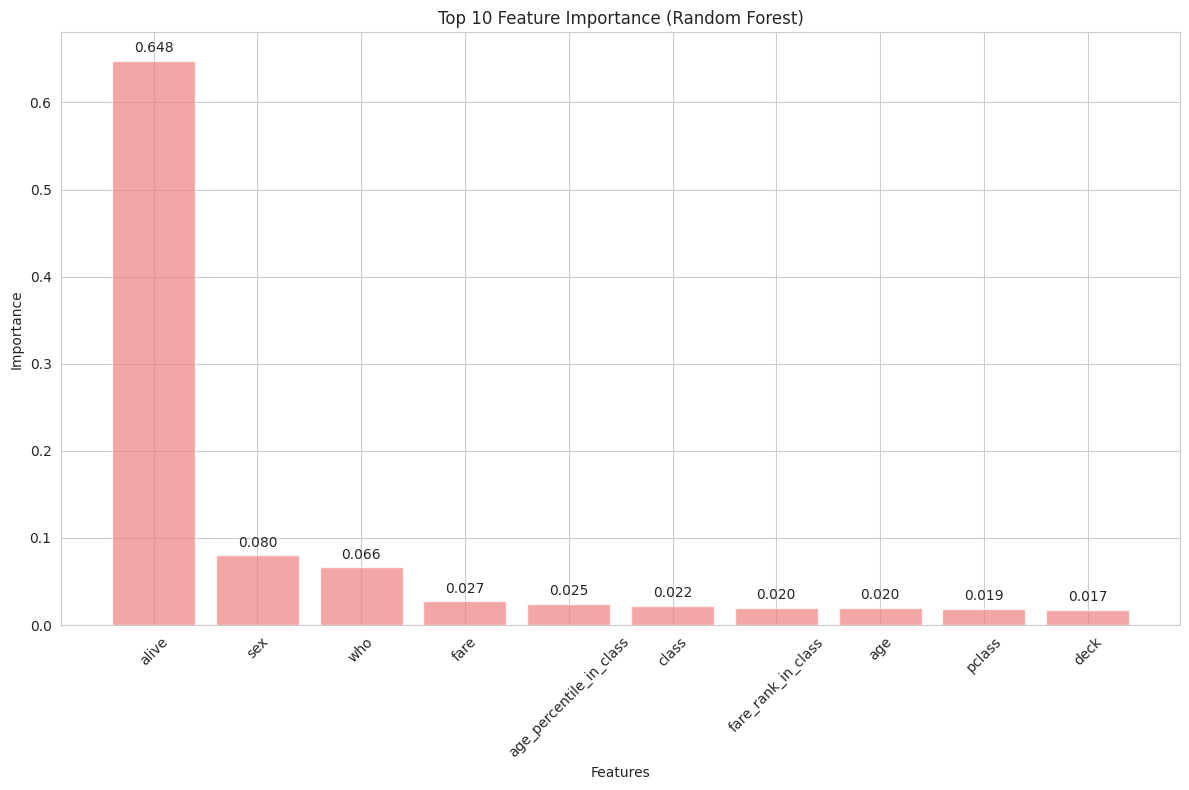

In [50]:
# 생존 분석 심화 - 다차원 분석

print("=== 생존 분석 심화 ===")

# 1. 다차원 생존율 분석
def multi_dimensional_survival_analysis():
    """다차원 생존율 분석"""
    
    # 성별-클래스-연령대별 생존율
    if all(col in titanic_engineered.columns for col in ['sex', 'class', 'age_group']):
        multi_survival = titanic_engineered.groupby(['sex', 'class', 'age_group']).agg({
            'survived': ['count', 'sum', 'mean']
        }).round(3)
        
        multi_survival.columns = ['total', 'survivors', 'survival_rate']
        multi_survival = multi_survival[multi_survival['total'] >= 5]  # 샘플이 5명 이상인 경우만
        
        print("1. 성별-클래스-연령대별 생존율 (샘플 5명 이상):")
        print(multi_survival.sort_values('survival_rate', ascending=False).head(10))
    
    # 2. 요금과 생존의 관계 (구간별)
    if 'fare' in titanic_engineered.columns:
        # 요금을 10개 구간으로 나누어 분석
        titanic_engineered['fare_decile'] = pd.qcut(
            titanic_engineered['fare'].fillna(titanic_engineered['fare'].median()), 
            q=10, 
            labels=[f'D{i+1}' for i in range(10)]
        )
        
        fare_survival = titanic_engineered.groupby('fare_decile').agg({
            'fare': ['min', 'max', 'mean'],
            'survived': ['count', 'mean']
        }).round(2)
        
        fare_survival.columns = ['min_fare', 'max_fare', 'avg_fare', 'passenger_count', 'survival_rate']
        
        print(f"\n2. 요금 구간별 생존율 (십분위):")
        print(fare_survival)
    
    return multi_survival if 'multi_survival' in locals() else None

multi_analysis = multi_dimensional_survival_analysis()

# 3. 가설 검증을 위한 통계 테스트
from scipy.stats import chi2_contingency

def statistical_tests():
    """통계적 유의성 검증"""
    print(f"\n=== 통계적 유의성 검증 ===")
    
    # 카이제곱 검정: 성별과 생존의 독립성
    if all(col in titanic_engineered.columns for col in ['sex', 'survived']):
        contingency_table = pd.crosstab(titanic_engineered['sex'], titanic_engineered['survived'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        print(f"1. 성별과 생존의 독립성 검정:")
        print(f"   Chi-square statistic: {chi2:.4f}")
        print(f"   P-value: {p_value:.4e}")
        print(f"   결론: {'유의한 관계 있음' if p_value < 0.05 else '유의한 관계 없음'}")
        
        print(f"   분할표:")
        print(contingency_table)
    
    # 클래스와 생존의 독립성
    if all(col in titanic_engineered.columns for col in ['class', 'survived']):
        contingency_table_class = pd.crosstab(titanic_engineered['class'], titanic_engineered['survived'])
        chi2_class, p_value_class, dof_class, expected_class = chi2_contingency(contingency_table_class)
        
        print(f"\n2. 클래스와 생존의 독립성 검정:")
        print(f"   Chi-square statistic: {chi2_class:.4f}")
        print(f"   P-value: {p_value_class:.4e}")
        print(f"   결론: {'유의한 관계 있음' if p_value_class < 0.05 else '유의한 관계 없음'}")

statistical_tests()

# 4. 생존 예측 모델을 위한 특성 중요도 (간단한 버전)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

def feature_importance_analysis():
    """특성 중요도 분석"""
    print(f"\n=== 특성 중요도 분석 ===")
    
    # 데이터 준비
    df_model = titanic_engineered.copy()
    
    # 범주형 변수 인코딩
    categorical_cols = df_model.select_dtypes(include=['object', 'category']).columns
    le_dict = {}
    
    for col in categorical_cols:
        if col in df_model.columns and col != 'name':  # name은 제외
            le = LabelEncoder()
            df_model[col] = le.fit_transform(df_model[col].astype(str))
            le_dict[col] = le
    
    # 특성과 타겟 분리
    feature_cols = [col for col in df_model.columns 
                   if col not in ['survived', 'name'] and df_model[col].dtype in ['int64', 'float64']]
    
    X = df_model[feature_cols].fillna(df_model[feature_cols].median())
    y = df_model['survived']
    
    # 랜덤 포레스트 모델 학습
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # 특성 중요도 추출
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("특성 중요도 (랜덤 포레스트 기준):")
    print(feature_importance.head(10))
    
    # 특성 중요도 시각화
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(10)
    bars = plt.bar(range(len(top_features)), top_features['importance'], 
                   color='lightcoral', alpha=0.7)
    plt.title('Top 10 Feature Importance (Random Forest)')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(range(len(top_features)), top_features['feature'], rotation=45)
    
    # 막대 위에 값 표시
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(top_features['importance']) * 0.01,
                f'{height:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return feature_importance

importance_analysis = feature_importance_analysis()

In [51]:
# 백엔드 개발자가 꼭 알아야 할 pandas 핵심 개념 정리

pandas_essentials = {
    "데이터 구조": {
        "Series": "1차원 라벨된 배열 (SQL의 컬럼과 유사)",
        "DataFrame": "2차원 테이블 구조 (관계형 데이터베이스 테이블과 유사)",
        "Index": "행과 열의 라벨 (데이터베이스의 인덱스와 유사)"
    },
    
    "데이터 조작 (SQL 대비)": {
        "SELECT": "df[['column1', 'column2']]",
        "WHERE": "df[df['column'] > value]",
        "ORDER BY": "df.sort_values('column')",
        "GROUP BY": "df.groupby('column').agg()",
        "JOIN": "pd.merge(df1, df2, on='key')",
        "UNION": "pd.concat([df1, df2])"
    },
    
    "데이터 분석 워크플로우": {
        "1. 데이터 로드": "pd.read_csv(), pd.read_sql()",
        "2. 데이터 탐색": "df.info(), df.describe(), df.head()",
        "3. 데이터 정제": "결측값 처리, 이상치 제거, 타입 변환",
        "4. 특성 엔지니어링": "새로운 컬럼 생성, 파생 변수 만들기",
        "5. 분석 및 시각화": "groupby, pivot, 상관관계 분석",
        "6. 결과 저장": "df.to_csv(), df.to_sql()"
    },
    
    "성능 최적화": {
        "벡터화 연산": "반복문 대신 numpy 연산 활용",
        "데이터 타입 최적화": "category, int8/16, float32 사용",
        "인덱스 활용": "자주 필터링하는 컬럼을 인덱스로 설정",
        "청크 처리": "대용량 파일은 chunksize 매개변수 사용"
    }
}

print("=== 백엔드 개발자를 위한 pandas 핵심 요약 ===")
for category, items in pandas_essentials.items():
    print(f"\n📌 {category}")
    for key, value in items.items():
        print(f"   {key}: {value}")

=== 백엔드 개발자를 위한 pandas 핵심 요약 ===

📌 데이터 구조
   Series: 1차원 라벨된 배열 (SQL의 컬럼과 유사)
   DataFrame: 2차원 테이블 구조 (관계형 데이터베이스 테이블과 유사)
   Index: 행과 열의 라벨 (데이터베이스의 인덱스와 유사)

📌 데이터 조작 (SQL 대비)
   SELECT: df[['column1', 'column2']]
   WHERE: df[df['column'] > value]
   ORDER BY: df.sort_values('column')
   GROUP BY: df.groupby('column').agg()
   JOIN: pd.merge(df1, df2, on='key')
   UNION: pd.concat([df1, df2])

📌 데이터 분석 워크플로우
   1. 데이터 로드: pd.read_csv(), pd.read_sql()
   2. 데이터 탐색: df.info(), df.describe(), df.head()
   3. 데이터 정제: 결측값 처리, 이상치 제거, 타입 변환
   4. 특성 엔지니어링: 새로운 컬럼 생성, 파생 변수 만들기
   5. 분석 및 시각화: groupby, pivot, 상관관계 분석
   6. 결과 저장: df.to_csv(), df.to_sql()

📌 성능 최적화
   벡터화 연산: 반복문 대신 numpy 연산 활용
   데이터 타입 최적화: category, int8/16, float32 사용
   인덱스 활용: 자주 필터링하는 컬럼을 인덱스로 설정
   청크 처리: 대용량 파일은 chunksize 매개변수 사용


In [52]:
# 실무에서 pandas를 효과적으로 활용하기 위한 가이드라인

practical_guidelines = """
=== 실무 pandas 활용 가이드라인 ===

🔍 1. 데이터 분석 프로젝트 시작 시
   - 항상 데이터 품질부터 확인 (df.info(), df.describe())
   - 결측값과 이상치 패턴 파악
   - 메모리 사용량 체크 (큰 데이터셋의 경우)

📊 2. 탐색적 데이터 분석 (EDA)
   - 단변량 분석: 히스토그램, 박스플롯
   - 이변량 분석: 산점도, 상관관계
   - 다변량 분석: 그룹화, 피벗 테이블

🛠️ 3. 데이터 전처리
   - 결측값: 도메인 지식을 활용한 처리 전략
   - 이상치: 비즈니스 맥락에서 판단
   - 특성 엔지니어링: 도메인 전문가와 협업

📈 4. 분석 결과 해석
   - 통계적 유의성 고려
   - 실무진과 소통 가능한 인사이트 도출
   - 시각화를 통한 직관적 전달

⚡ 5. 성능 고려사항
   - 100MB 이상: 데이터 타입 최적화 필수
   - 1GB 이상: 청크 단위 처리 또는 Dask 사용 검토
   - 10GB 이상: 데이터베이스 내 처리 또는 분산 처리 고려
"""

print(practical_guidelines)


=== 실무 pandas 활용 가이드라인 ===

🔍 1. 데이터 분석 프로젝트 시작 시
   - 항상 데이터 품질부터 확인 (df.info(), df.describe())
   - 결측값과 이상치 패턴 파악
   - 메모리 사용량 체크 (큰 데이터셋의 경우)

📊 2. 탐색적 데이터 분석 (EDA)
   - 단변량 분석: 히스토그램, 박스플롯
   - 이변량 분석: 산점도, 상관관계
   - 다변량 분석: 그룹화, 피벗 테이블

🛠️ 3. 데이터 전처리
   - 결측값: 도메인 지식을 활용한 처리 전략
   - 이상치: 비즈니스 맥락에서 판단
   - 특성 엔지니어링: 도메인 전문가와 협업

📈 4. 분석 결과 해석
   - 통계적 유의성 고려
   - 실무진과 소통 가능한 인사이트 도출
   - 시각화를 통한 직관적 전달

⚡ 5. 성능 고려사항
   - 100MB 이상: 데이터 타입 최적화 필수
   - 1GB 이상: 청크 단위 처리 또는 Dask 사용 검토
   - 10GB 이상: 데이터베이스 내 처리 또는 분산 처리 고려

